![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 3: Image processing exercises

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-22)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/06_Image_processing.ipynb)

**Resources:**

* [SciPy](https://scipy.org)
* [Scipy Lectures](https://scipy-lectures.org)
* [NumPy](https://numpy.org)

# EXERCISE 1: image filtering [OBLIGATORY]

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg



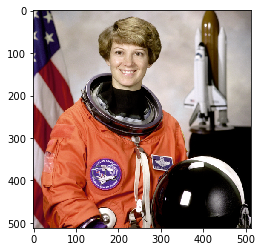

In [2]:
import imageio
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from skimage.data import astronaut

image = astronaut()

plt.imshow(image)

In [3]:
image.shape

(512, 512, 3)

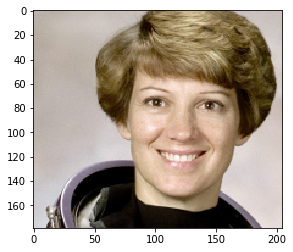

In [4]:
lx, ly, col = image.shape

crop_image = image[lx//20:(2*lx)//5, 
              ly//5:(3*ly)//5]

plt.imshow(crop_image)

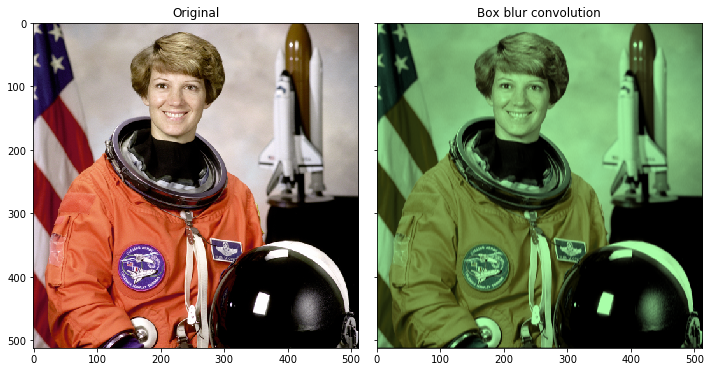

In [5]:
kernel = np.array([[[1/9,1/9,1/9]], 
                    [[1/9,1/9,1/9]], 
                    [[1/9,1/9,1/9]]]) 

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

[[[ 0 -1  0]]

 [[-1  5 -1]]

 [[ 0 -1  0]]]


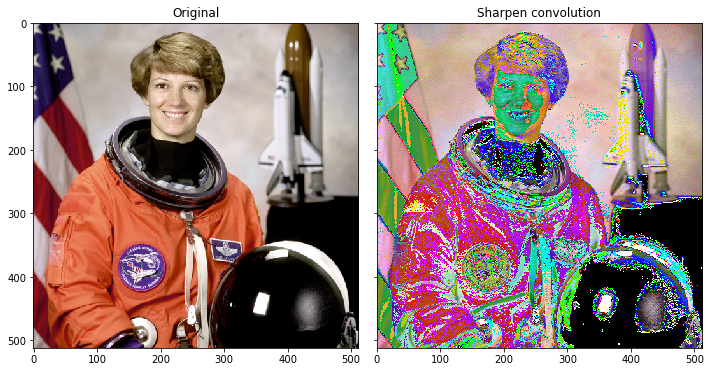

In [6]:
image = astronaut()

kernel = np.array([[[0, -1, 0]], 
                    [[-1, 5, -1]], 
                    [[0, -1, 0]]])

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

In [8]:
from skimage import img_as_ubyte
img = img_as_ubyte(image)

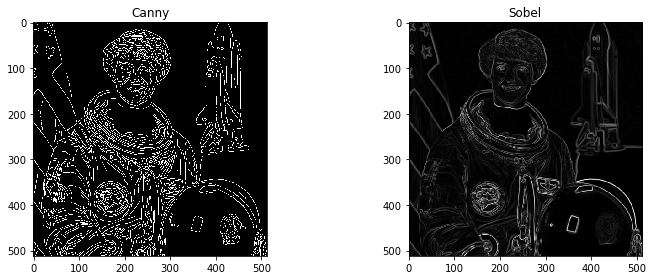

In [9]:
from skimage.feature import canny
from skimage.filters import sobel
from skimage.color import rgb2gray

image_gray = rgb2gray(image)

canny_image_gray = canny(image_gray)

sobel_image_gray = sobel(image_gray)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(canny_image_gray, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_image_gray, cmap=plt.cm.gray)
ax[1].set_title('Sobel')

plt.tight_layout()
plt.show()

In [10]:
from scipy import misc

f = misc.face()
type(f)

numpy.ndarray

In [12]:
type(canny_image_gray)
imageio.imwrite('face.jpg', f)

In [13]:
sobel_uint8 = sobel_image_gray.astype(np.uint8)

In [14]:
from scipy import misc

imageio.imwrite('sobim.jpg', sobel_uint8)

# EXERCISE 2: image segmentation [OBLIGATORY]

Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background).

* Load the image with scikit image
* Count the objects in the image using region based segmentation
* Try to fix the image using opening/closing algorithms



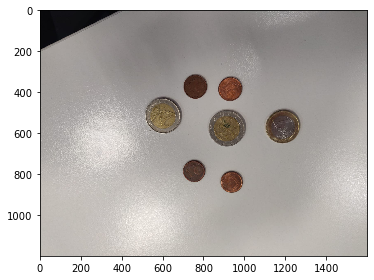

In [21]:
from skimage.io import imread, imshow
my_image=imread('Coins.jpg')
imshow(my_image)

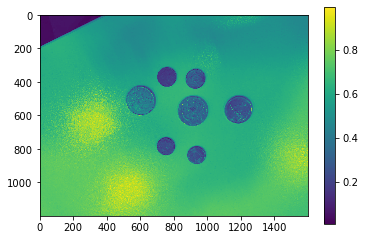

In [22]:
my_image_gray = rgb2gray(my_image)

plt.imshow(my_image_gray)
plt.colorbar()
plt.show()

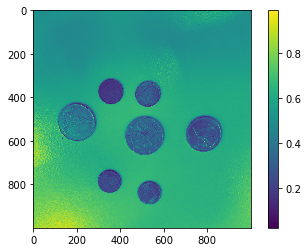

In [35]:
crop_image_coins = my_image_gray[0:1000, 400:1400]

plt.imshow(crop_image_coins)
plt.colorbar()
plt.show()

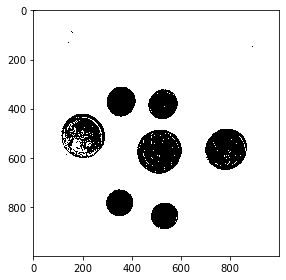

In [56]:
markers = np.zeros_like(crop_image_coins)
markers[crop_image_coins > 0.46] = 1
markers[crop_image_coins < 0.46] = 0
imshow(markers)

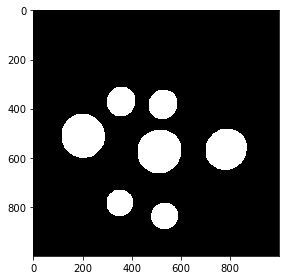

In [90]:
fill_holes = ndi.binary_fill_holes(markers-1)
open_holes=ndimage.binary_opening(fill_holes, structure=np.ones((30,30)))

imshow(open_holes)

7


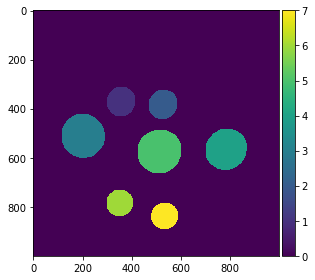

In [91]:
label_objects, nb_labels = ndi.label(open_holes)
print(nb_labels)
imshow(label_objects)

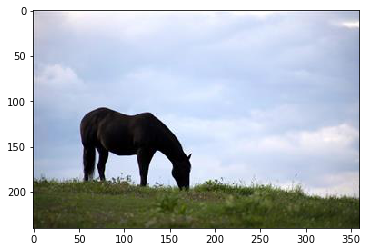

In [15]:
horse = imageio.imread('horse.jpg')
horse.shape
plt.imshow(horse)

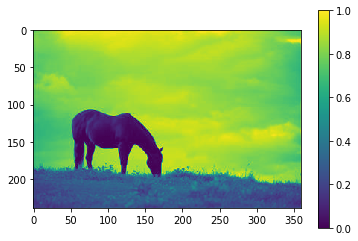

In [17]:
horse_gray = rgb2gray(horse)

plt.imshow(horse_gray)
plt.colorbar()
plt.show()

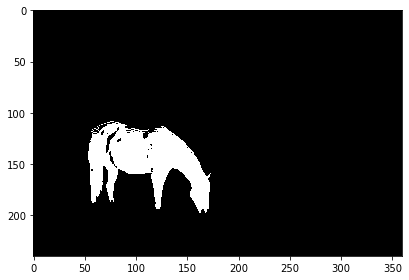

In [18]:
from skimage.color import rgba2rgb
from skimage import data
from skimage.io import imshow

markers = np.zeros_like(horse_gray)
markers[horse_gray > 0.12] = 0
markers[horse_gray < 0.12] = 1
imshow(markers)

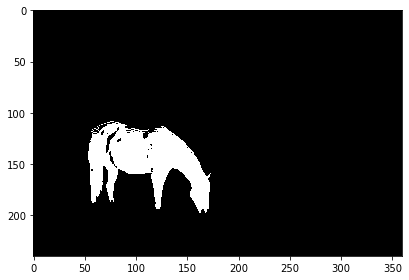

In [19]:
from scipy import ndimage as ndi
fill_ = ndi.binary_fill_holes(markers)
imshow(markers)

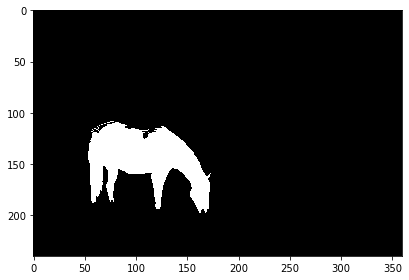

In [20]:
from scipy import ndimage as ndi
fill_horse = ndi.binary_fill_holes(markers)
imshow(fill_horse)